In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
df=pd.read_csv("email.csv")

In [51]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [55]:
df.duplicated().sum()

415

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
df.duplicated().sum()

0

In [58]:
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
%matplotlib inline

In [60]:
x=df['Message']
y=df['Category']
x_train, x_test,y_train, y_test = train_test_split(df["Message"],df["Category"],test_size = 0.2,random_state=42)

In [61]:
cv=CountVectorizer()
x_train_vectorized = cv.fit_transform(x_train)
x_test_vectorized = cv.transform(x_test)

In [62]:
print(x_test_vectorized)

  (0, 887)	1
  (0, 3208)	1
  (0, 4182)	1
  (0, 4852)	1
  (0, 5831)	1
  (0, 6023)	1
  (0, 6745)	1
  (1, 2126)	1
  (1, 3465)	1
  (1, 4140)	1
  (1, 4717)	1
  (1, 6876)	1
  (1, 7125)	1
  (1, 7574)	1
  (2, 1741)	1
  (2, 1837)	1
  (2, 2525)	1
  (2, 3243)	1
  (2, 4536)	1
  (2, 6633)	1
  (2, 6726)	1
  (3, 1526)	1
  (3, 3696)	1
  (3, 4331)	1
  (3, 4828)	1
  :	:
  (1030, 5871)	1
  (1030, 6015)	1
  (1030, 6712)	1
  (1030, 6713)	4
  (1030, 6835)	1
  (1030, 7107)	1
  (1030, 7293)	2
  (1030, 7610)	1
  (1031, 291)	1
  (1031, 509)	1
  (1031, 642)	1
  (1031, 1158)	1
  (1031, 1627)	2
  (1031, 2075)	1
  (1031, 3406)	1
  (1031, 3579)	1
  (1031, 3683)	1
  (1031, 4322)	1
  (1031, 4536)	1
  (1031, 4759)	1
  (1031, 4863)	1
  (1031, 5440)	1
  (1031, 5912)	1
  (1031, 6835)	2
  (1031, 7107)	2


In [63]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_vectorized, y_train)

DecisionTreeClassifier()

In [64]:
y_pred=dt.predict(x_test_vectorized)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

da=accuracy_score(y_test,y_pred)
dp = precision_score(y_test, y_pred, pos_label='spam')
dr = recall_score(y_test, y_pred, pos_label='spam')
df1 = f1_score(y_test, y_pred, pos_label='spam')
print('Accuracy:', da)
print('Precision:', dp)
print('Recall:', dr)
print('F1 score:', df1)

Accuracy: 0.9670542635658915
Precision: 0.90625
Recall: 0.8405797101449275
F1 score: 0.8721804511278196


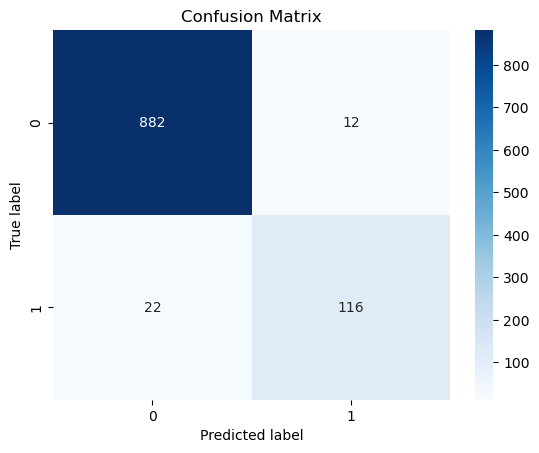

In [66]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### Naves Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_vectorized, y_train)

MultinomialNB()

In [68]:
y_pred=nb.predict(x_test_vectorized)

In [69]:
na=accuracy_score(y_test,y_pred)
np = precision_score(y_test, y_pred, pos_label='spam')
nr = recall_score(y_test, y_pred, pos_label='spam')
nf1 = f1_score(y_test, y_pred, pos_label='spam')

print('Accuracy:', na)
print('Precision:', np)
print('Recall:', nr)
print('F1 score:', nf1)

Accuracy: 0.9815891472868217
Precision: 0.983739837398374
Recall: 0.8768115942028986
F1 score: 0.9272030651340997


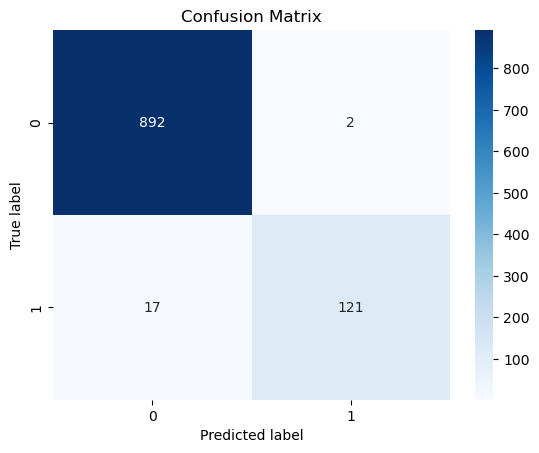

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### Knn Classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier()
knn.fit(x_train_vectorized, y_train)

KNeighborsClassifier()

In [73]:
y_pred=nb.predict(x_test_vectorized)

In [74]:
ka=accuracy_score(y_test,y_pred)
kp= precision_score(y_test, y_pred, pos_label='spam')
kr = recall_score(y_test, y_pred, pos_label='spam')
kf1 = f1_score(y_test, y_pred, pos_label='spam')

print('Accuracy:', ka)
print('Precision:', kp)
print('Recall:', kr)
print('F1 score:', kf1)

Accuracy: 0.9815891472868217
Precision: 0.983739837398374
Recall: 0.8768115942028986
F1 score: 0.9272030651340997


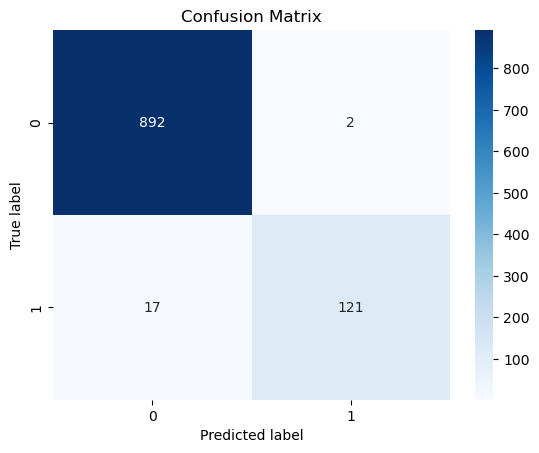

In [75]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()